In [1]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline
plt.rc('figure', figsize=(15.0, 8.0))

In [3]:
def shuffle(arr):
    hp = int(arr.size / 2)
    copy = arr.copy()
    arr[1:-1:2] = arr[hp:-1:1]
    arr[2:-1:2] = copy[1:hp]

In [4]:
def is_shuffled(arr):
    return arr[1] == 1

In [5]:
def perfect_shuffle(arr, f, *args, **kwargs):
    while True:
        shuffle(arr)
        f(*args, **kwargs)
        if is_shuffled(arr):
            break

In [6]:
def inc_count(counts, i):
    counts[i] += 1
    
def shuffle_many(n):
    counts = defaultdict(int)
    arr = np.arange(n * 2)
    for i in range(2, n):
        sliced = arr[:i * 2]
        perfect_shuffle(sliced, inc_count, counts, i)
    return counts

In [7]:
counts = shuffle_many(1000)

In [8]:
def mkplot(x, y):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel('n')
    ax.set_ylabel('shuffles')
    ax.grid(True)
    ax.plot(x, y)

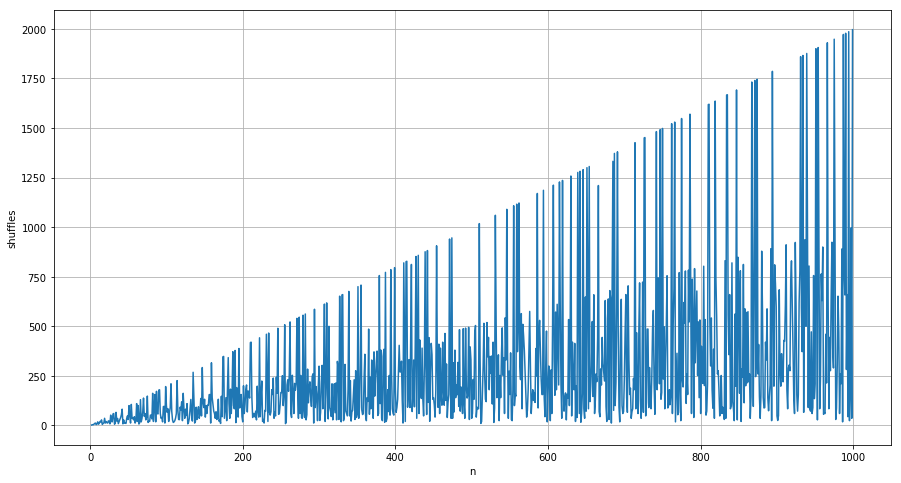

In [9]:
mkplot(list(counts.keys()), list(counts.values()))

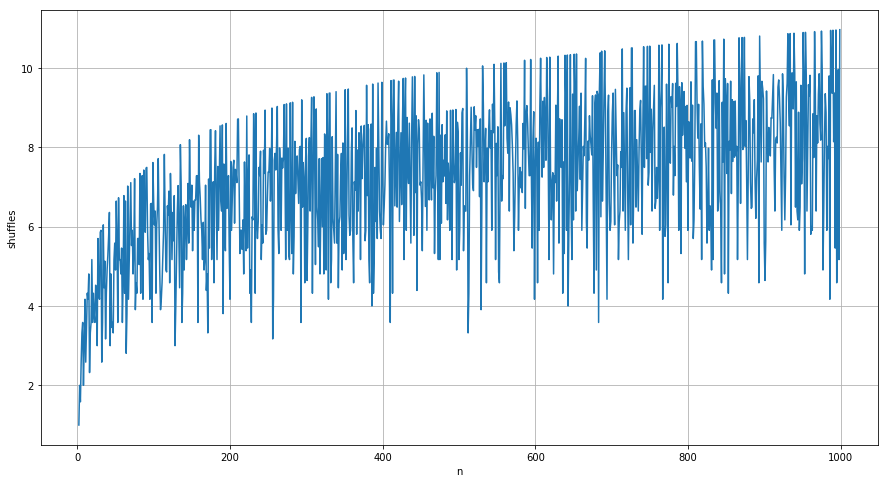

In [10]:
#filtered = dict(filter(lambda args: args[1] < 700, counts.items()))
mkplot(list(counts.keys()), list(map(lambda v: np.log2(v), counts.values())))

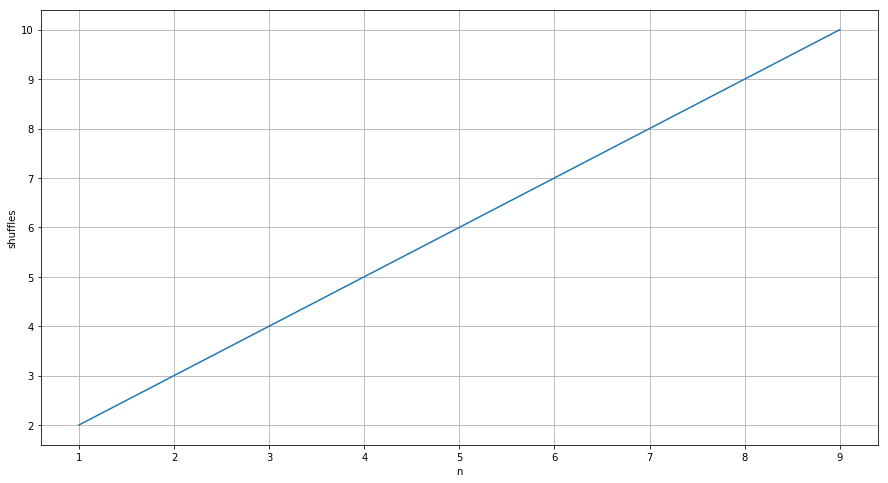

In [11]:
def filter_fn(args):
    k, v = args
    return np.log2(k) % 1 == 0

filtered = dict(filter(filter_fn, counts.items()))
mkplot(list(map(lambda v: np.log2(v), filtered.keys())), list(filtered.values()))

In [12]:
def append_idx(arr, dct):
    for i, elem in enumerate(arr):
        dct.get(elem).append(i)

def shuffle_one(n):
    arr = np.arange(n * 2)
    dct = {elem: [elem] for elem in arr}
    perfect_shuffle(arr, append_idx, arr, dct)
    return dct

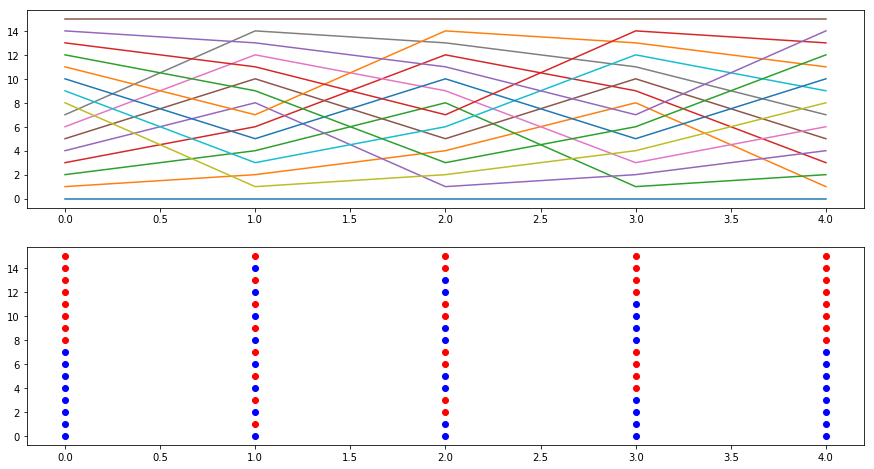

In [13]:
strings = defaultdict(list)
N = 8
shuffled = shuffle_one(N)

for i in range(len(shuffled)):
    plt.subplot(211)
    plt.plot(shuffled[i])
    plt.subplot(212)

    for j, v in enumerate(reversed(shuffled[i])):
        c, s = ('b', 'A') if v < N else ('r', 'B')
        strings[j].append(s)
        plt.plot(j, i, c=c, marker='o')

In [14]:
for key in range(len(strings)):
    print(''.join(strings.get(key)))

AAAAAAAABBBBBBBB
ABABABABABABABAB
AABBAABBAABBAABB
AAAABBBBAAAABBBB
AAAAAAAABBBBBBBB


In [15]:
import itertools

In [16]:
def mklookup(n):
    return {''.join(item):''.join(item).replace('A', '0').replace('B', '1') 
            for item in itertools.product('AB', repeat=n)}

In [17]:
lookup = mklookup(4)

In [18]:
for key in range(len(strings)):
    joined = ''.join(strings.get(key))
    
    s = '0b' + ''.join([lookup.get(''.join(joined[i:i+4]))
                        for i in range(0, len(joined), 4)])
    print(int(s, 2))

255
21845
13107
3855
255


In [19]:
freq = defaultdict(int)
chunk = 2
for key in range(len(strings)):
    joined = ''.join(strings.get(key))
    print(joined)
    for i in range(0, len(joined), chunk):
        freq[joined[i:i+chunk]] += 1
print(freq)

AAAAAAAABBBBBBBB
ABABABABABABABAB
AABBAABBAABBAABB
AAAABBBBAAAABBBB
AAAAAAAABBBBBBBB
defaultdict(<class 'int'>, {'AA': 16, 'BB': 16, 'AB': 8})
